# Feature Selection 

Testing some methods for features selection and target definition 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load the dataframe

In [11]:
path = r"C:\Users\TALAE LOCAL\Desktop\weldb_clean.csv"  # path to the clean csv 
df = pd.read_csv(path)

In [12]:
df

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Charpy temperature / °C,Charpy impact toughness / J,Hardness / kgmm-2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggreagate / %,Weld ID
0,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,-28.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,-38.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.037,0.31,1.03,0.007,0.014,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.037,0.31,1.03,0.007,0.014,0.00,NaN,NaN,NaN,NaN,...,-48.0,100.0,NaN,NaN,32.0,28.0,40.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning

In [13]:
df.describe()

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Charpy temperature / °C,Charpy impact toughness / J,Hardness / kgmm-2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggreagate / %,Weld ID
count,1652.000000,1652.000000,1652.000000,1641.000000,1642.000000,697.000000,784.000000,791.000000,620.000000,564.000000,...,879.000000,879.00000,80.000000,31.000000,96.000000,90.000000,90.000000,89.000000,89.000000,0.0
mean,0.075521,0.328577,1.202821,0.009561,0.012952,0.415034,2.101273,0.480358,0.072443,0.176188,...,-34.606371,87.68942,215.700000,-31.096774,19.552083,25.955556,52.833333,0.337079,0.438202,NaN
std,0.023898,0.112455,0.382137,0.011239,0.019627,0.786951,3.026548,0.477423,0.096364,0.325897,...,34.738624,50.11670,24.656321,43.644285,10.773134,21.283486,23.483798,3.179994,1.397685,NaN
min,0.029000,0.040000,0.270000,0.001000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-114.000000,3.00000,154.000000,-126.000000,0.000000,3.000000,0.000000,0.000000,0.000000,NaN
25%,0.061750,0.270000,0.940000,0.006000,0.007000,0.000000,0.000000,0.000000,0.004000,0.000000,...,-60.000000,38.00000,193.750000,-62.000000,13.750000,9.000000,35.500000,0.000000,0.000000,NaN
50%,0.074000,0.320000,1.270000,0.007000,0.010000,0.067000,0.530000,0.340000,0.015000,0.030000,...,-40.000000,100.00000,221.000000,-15.000000,19.000000,18.000000,60.000000,0.000000,0.000000,NaN
75%,0.086000,0.360000,1.440000,0.010000,0.014000,0.260000,2.300000,1.010000,0.180000,0.190000,...,-17.500000,100.00000,231.000000,5.000000,24.000000,38.000000,71.750000,0.000000,0.000000,NaN
max,0.180000,1.140000,2.250000,0.140000,0.250000,3.500000,10.200000,1.500000,0.320000,1.630000,...,188.000000,270.00000,265.000000,30.000000,48.000000,100.000000,88.000000,30.000000,8.000000,NaN


Drop the categorical columns for later and keep it in a numerical dataframe df_num

In [15]:
df.columns


Index(['Carbon concentration / (weight%)', 'Silicon concentration / (weight%)',
       'Manganese concentration / (weight%)',
       'Sulphur concentration / (weight%)',
       'Phosphorus concentration / (weight%)',
       'Nickel concentration / (weight%)',
       'Chromium concentration / (weight%)',
       'Molybdenum concentration / (weight%)',
       'Vanadium concentration / (weight%)',
       'Copper concentration / (weight%)', 'Cobalt concentration / (weight%)',
       'Tungsten concentration / (weight%)',
       'Oxygen concentration / parts per million by weight',
       'Titanium concentration / parts per million by weight',
       'Nitrogen concentration / parts per million by weight',
       'Aluminium concentration / parts per million by weight',
       'Boron concentration / parts per million by weight',
       'Niobium concentration / parts per million by weight',
       'Tin concentration / parts per million by weight',
       'Arsenic concentration / parts per millio

In [16]:
cat_cols = ['Weld ID', 'Type of weld;','AC or DC', 'Electrode positive or negative'] 
df_num = df.drop(columns=cat_cols).copy()

In [17]:
df_num

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Reduction of Area / %,Charpy temperature / °C,Charpy impact toughness / J,Hardness / kgmm-2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggreagate / %
0,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,80.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,NaN,-28.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,80.6,-38.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.037,0.31,1.03,0.007,0.014,0.00,NaN,NaN,NaN,NaN,...,80.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.037,0.31,1.03,0.007,0.014,0.00,NaN,NaN,NaN,NaN,...,NaN,-48.0,100.0,NaN,NaN,32.0,28.0,40.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Distributions before imputation 

In [28]:
categories = {
    "composition": [
        'Carbon concentration / (weight%)', # 
        'Silicon concentration / (weight%)', #
        'Manganese concentration / (weight%)',#
        'Sulphur concentration / (weight%)',#
        'Phosphorus concentration / (weight%)',#
        'Nickel concentration / (weight%)',#
        'Chromium concentration / (weight%)',#
        'Molybdenum concentration / (weight%)',#
        'Vanadium concentration / (weight%)', #
        'Copper concentration / (weight%)', #
        'Cobalt concentration / (weight%)', #
        'Tungsten concentration / (weight%)', #
        'Oxygen concentration / parts per million by weight',
        'Titanium concentration / parts per million by weight', #
        'Nitrogen concentration / parts per million by weight', 
        'Aluminium concentration / parts per million by weight',
        'Boron concentration / parts per million by weight', #
        'Niobium concentration / parts per million by weight', #
        'Tin concentration / parts per million by weight',
        'Arsenic concentration / parts per million by weight',
        'Antimony concentration / parts per million by weight'
    ],
    "welding_parameters": [
        'Current / A',
        'Voltage / V', 
        'AC or DC', 
        'Electrode positive or negative',
        'Heat input / kJmm-1', #
        'Interpass temperature / °C', #
        'Type of weld;',
        'Post weld heat treatment temperature / °C', #
        'Post weld heat treatment time / hours'
    ],
    "mechanical_properties": [
        'Yield strength / MPa',  # Target
        'Ultimate tensile strength / MPa', 
        'Elongation / %',
        'Reduction of Area / %',
        'Charpy temperature / °C',
        'Charpy impact toughness / J', 
        'Hardness / kgmm-2', 
        '50 % FATT'
    ],
    "microstructure": [
        'Primary ferrite in microstructure / %',
        'Ferrite with second phase / %', 
        'Acicular ferrite / %',
        'Martensite / %', 
        'Ferrite with carbide aggreagate / %'
    ],
    "identifiers": [
        'Weld ID'
    ]
}


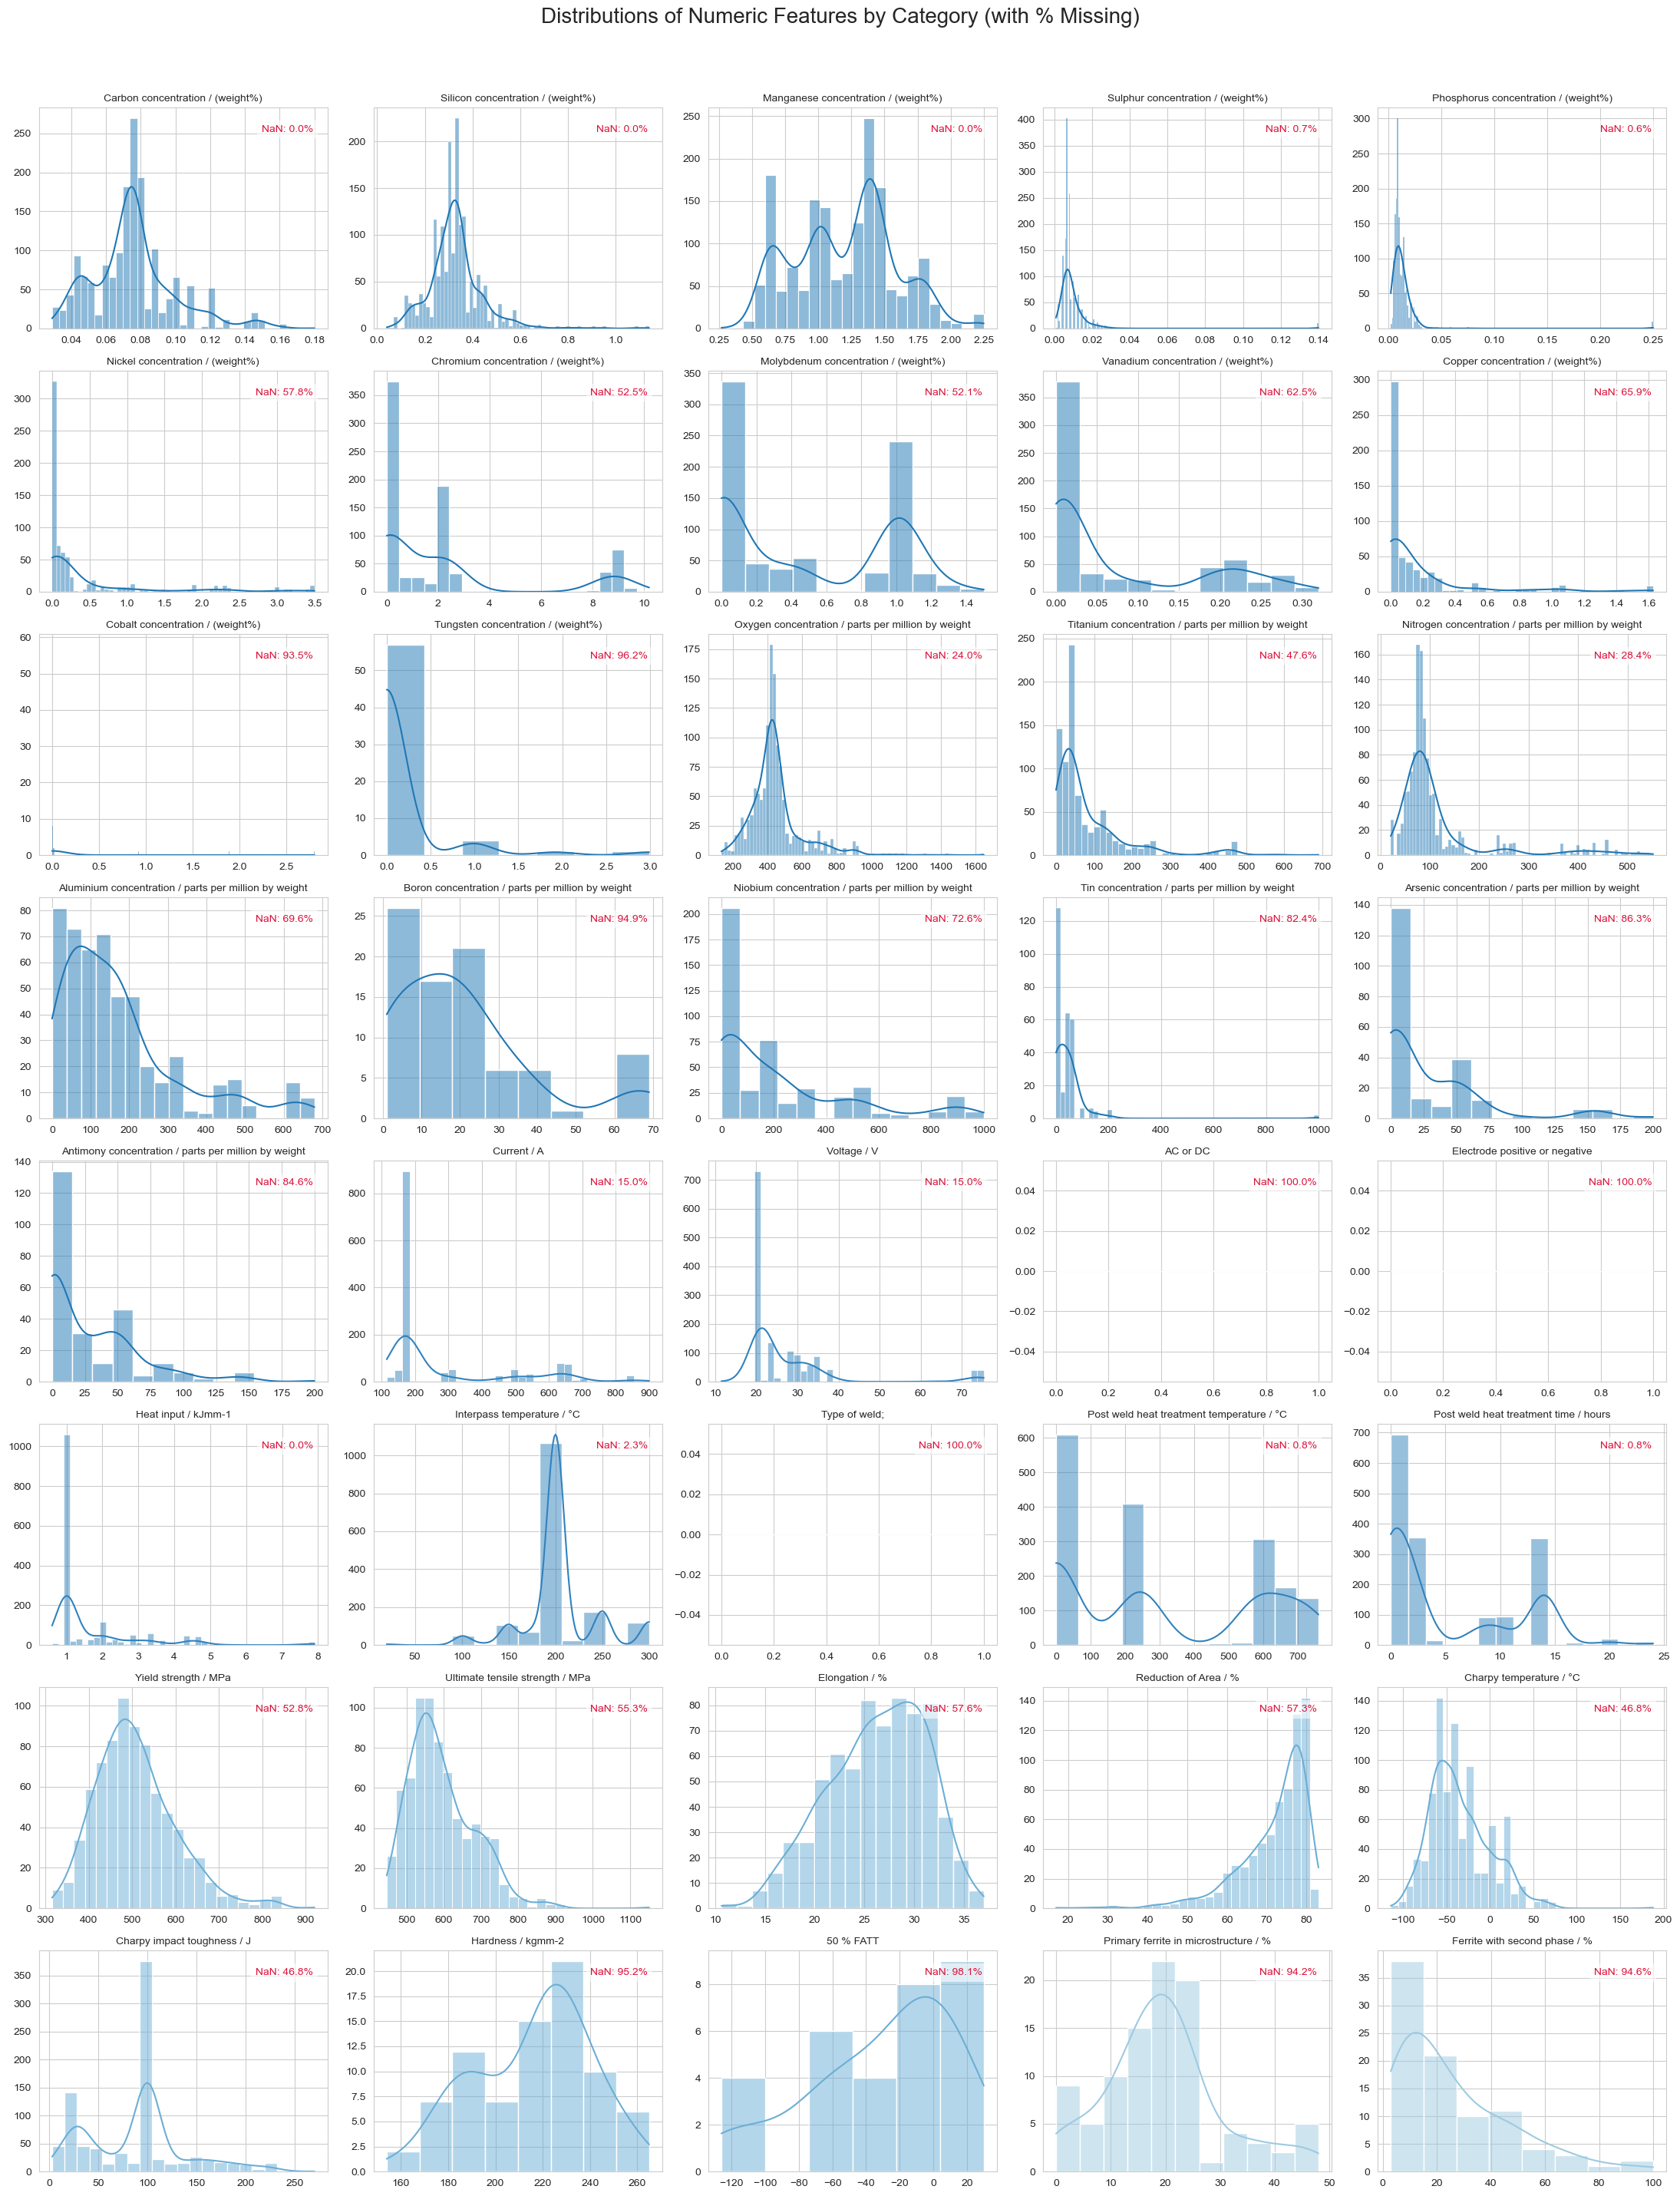

In [ ]:
# Compute missing percentages 
missing_pct = df_num.isnull().mean() * 100  # %

# Plot setup 
sns.set_style("whitegrid")
n_cols = 5
n_rows = 8

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 28))
axes = axes.flatten()

# Loop over numeric columns
for i, col in enumerate(df_num.columns[:n_rows * n_cols]):
    sns.histplot(df_num[col], kde=True, color="royalblue", ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    # Add missing value indicator (top-right corner)
    miss_text = f"NaN: {missing_pct[col]:.1f}%"
    axes[i].text(0.95, 0.9, miss_text,
                 transform=axes[i].transAxes,
                 ha="right", va="center",
                 fontsize=12,
                 color="crimson",
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# Hide unused subplots 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distributions of Numeric Features (with % Missing)", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

#### 1. Handling missing values and imputation

Based on the thesis , phosphur and sumlphur will be imputated by mean and the otehr concnetrations imputed by zero 

In [31]:
composition_cols = categories["composition"]
print(composition_cols)

['Carbon concentration / (weight%)', 'Silicon concentration / (weight%)', 'Manganese concentration / (weight%)', 'Sulphur concentration / (weight%)', 'Phosphorus concentration / (weight%)', 'Nickel concentration / (weight%)', 'Chromium concentration / (weight%)', 'Molybdenum concentration / (weight%)', 'Vanadium concentration / (weight%)', 'Copper concentration / (weight%)', 'Cobalt concentration / (weight%)', 'Tungsten concentration / (weight%)', 'Oxygen concentration / parts per million by weight', 'Titanium concentration / parts per million by weight', 'Nitrogen concentration / parts per million by weight', 'Aluminium concentration / parts per million by weight', 'Boron concentration / parts per million by weight', 'Niobium concentration / parts per million by weight', 'Tin concentration / parts per million by weight', 'Arsenic concentration / parts per million by weight', 'Antimony concentration / parts per million by weight']


In [35]:
df_num[composition_cols].describe()


,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Tungsten concentration / (weight%),Oxygen concentration / parts per million by weight,Titanium concentration / parts per million by weight,Nitrogen concentration / parts per million by weight,Aluminium concentration / parts per million by weight,Boron concentration / parts per million by weight,Niobium concentration / parts per million by weight,Tin concentration / parts per million by weight,Arsenic concentration / parts per million by weight,Antimony concentration / parts per million by weight
count,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,...,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000
mean,0.075521,0.328577,1.202821,0.009561,0.012952,0.175108,0.997214,0.230002,0.027188,0.060151,...,0.005369,336.023608,42.552966,81.190678,52.547869,1.062954,59.507869,7.362356,3.913115,4.327228
std,0.023898,0.112455,0.382137,0.011202,0.019567,0.550553,2.333634,0.408268,0.068649,0.207850,...,0.099974,228.375675,83.025636,95.914632,117.019572,6.174597,168.419602,40.792398,18.270211,17.314885
min,0.029000,0.040000,0.270000,0.001000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.061750,0.270000,0.940000,0.006000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,175.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.074000,0.320000,1.270000,0.007000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,400.000000,5.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.086000,0.360000,1.440000,0.010000,0.014000,0.030000,0.402500,0.270000,0.010000,0.000000,...,0.000000,453.000000,42.000000,94.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.180000,1.140000,2.250000,0.140000,0.250000,3.500000,10.200000,1.500000,0.320000,1.630000,...,2.990000,1650.000000,690.000000,552.000000,680.000000,69.000000,1000.000000,1000.000000,200.000000,200.000000


In [34]:
for col in composition_cols:
    if col in ['Sulphur concentration / (weight%)', 'Phosphorus concentration / (weight%)']:
        # Impute with the mean of the column
        df_num[col] = df_num[col].fillna(df_num[col].mean())
    else:
        # Impute with 0 for all other composition elements
        df_num[col] = df_num[col].fillna(0)


If more than 50% of values are missing → drop them (risk of bias otherwise)

In [36]:
threshold = 0.6
df_num = df_num.loc[:, df_num.isnull().mean() < threshold]

In [37]:
df_num

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Heat input / kJmm-1,Interpass temperature / °C,Post weld heat treatment temperature / °C,Post weld heat treatment time / hours,Yield strength / MPa,Ultimate tensile strength / MPa,Elongation / %,Reduction of Area / %,Charpy temperature / °C,Charpy impact toughness / J
0,0.037,0.30,0.65,0.008,0.012,0.00,0.0,0.00,0.00,0.0,...,1.0,200.0,250.0,14.0,392.0,466.0,31.9,80.6,NaN,NaN
1,0.037,0.30,0.65,0.008,0.012,0.00,0.0,0.00,0.00,0.0,...,1.0,200.0,0.0,0.0,NaN,NaN,NaN,NaN,-28.0,100.0
2,0.037,0.30,0.65,0.008,0.012,0.00,0.0,0.00,0.00,0.0,...,1.0,200.0,580.0,2.0,370.0,456.0,35.2,80.6,-38.0,100.0
3,0.037,0.31,1.03,0.007,0.014,0.00,0.0,0.00,0.00,0.0,...,1.0,200.0,250.0,14.0,413.0,498.0,31.2,80.6,NaN,NaN
4,0.037,0.31,1.03,0.007,0.014,0.00,0.0,0.00,0.00,0.0,...,1.0,200.0,0.0,0.0,NaN,NaN,NaN,NaN,-48.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,0.0,...,2.0,200.0,760.0,2.0,834.0,NaN,NaN,NaN,NaN,NaN
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,0.0,...,2.0,200.0,760.0,2.0,822.0,NaN,NaN,NaN,NaN,NaN
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,0.0,...,2.0,200.0,760.0,2.0,660.0,NaN,NaN,NaN,NaN,NaN
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,0.0,...,2.0,200.0,760.0,2.0,832.0,NaN,NaN,NaN,NaN,NaN


In [38]:
df_num.columns 

Index(['Carbon concentration / (weight%)', 'Silicon concentration / (weight%)',
       'Manganese concentration / (weight%)',
       'Sulphur concentration / (weight%)',
       'Phosphorus concentration / (weight%)',
       'Nickel concentration / (weight%)',
       'Chromium concentration / (weight%)',
       'Molybdenum concentration / (weight%)',
       'Vanadium concentration / (weight%)',
       'Copper concentration / (weight%)', 'Cobalt concentration / (weight%)',
       'Tungsten concentration / (weight%)',
       'Oxygen concentration / parts per million by weight',
       'Titanium concentration / parts per million by weight',
       'Nitrogen concentration / parts per million by weight',
       'Aluminium concentration / parts per million by weight',
       'Boron concentration / parts per million by weight',
       'Niobium concentration / parts per million by weight',
       'Tin concentration / parts per million by weight',
       'Arsenic concentration / parts per millio

In [39]:
cols = ['Current / A',
       'Voltage / V', 'Heat input / kJmm-1', 'Interpass temperature / °C',
       'Post weld heat treatment temperature / °C',
       'Post weld heat treatment time / hours', 'Yield strength / MPa',
       'Ultimate tensile strength / MPa', 'Elongation / %',
       'Reduction of Area / %', 'Charpy temperature / °C',
       'Charpy impact toughness / J']

df_num[cols].describe()

,Current / A,Voltage / V,Heat input / kJmm-1,Interpass temperature / °C,Post weld heat treatment temperature / °C,Post weld heat treatment time / hours,Yield strength / MPa,Ultimate tensile strength / MPa,Elongation / %,Reduction of Area / %,Charpy temperature / °C,Charpy impact toughness / J
count,1404.000000,1404.000000,1652.000000,1614.000000,1639.000000,1639.000000,780.000000,738.000000,700.000000,705.000000,879.000000,879.00000
mean,283.843661,27.607379,1.700987,204.902726,304.674192,5.049652,508.557179,594.386314,26.275714,71.799858,-34.606371,87.68942
std,192.560955,12.555629,1.298465,39.550604,285.498003,6.096034,92.865446,88.636238,4.895986,8.926551,34.738624,50.11670
min,115.000000,11.500000,0.600000,20.000000,0.000000,0.000000,315.000000,447.000000,10.600000,17.000000,-114.000000,3.00000
25%,170.000000,21.000000,1.000000,200.000000,0.000000,0.000000,443.000000,532.775000,22.800000,68.000000,-60.000000,38.00000
50%,170.000000,21.000000,1.000000,200.000000,250.000000,2.000000,495.000000,575.500000,26.800000,75.000000,-40.000000,100.00000
75%,300.000000,30.000000,2.000000,200.000000,580.000000,10.000000,559.250000,647.000000,30.000000,78.000000,-17.500000,100.00000
max,900.000000,75.360000,7.900000,300.000000,760.000000,24.000000,920.000000,1151.000000,37.000000,83.000000,188.000000,270.00000


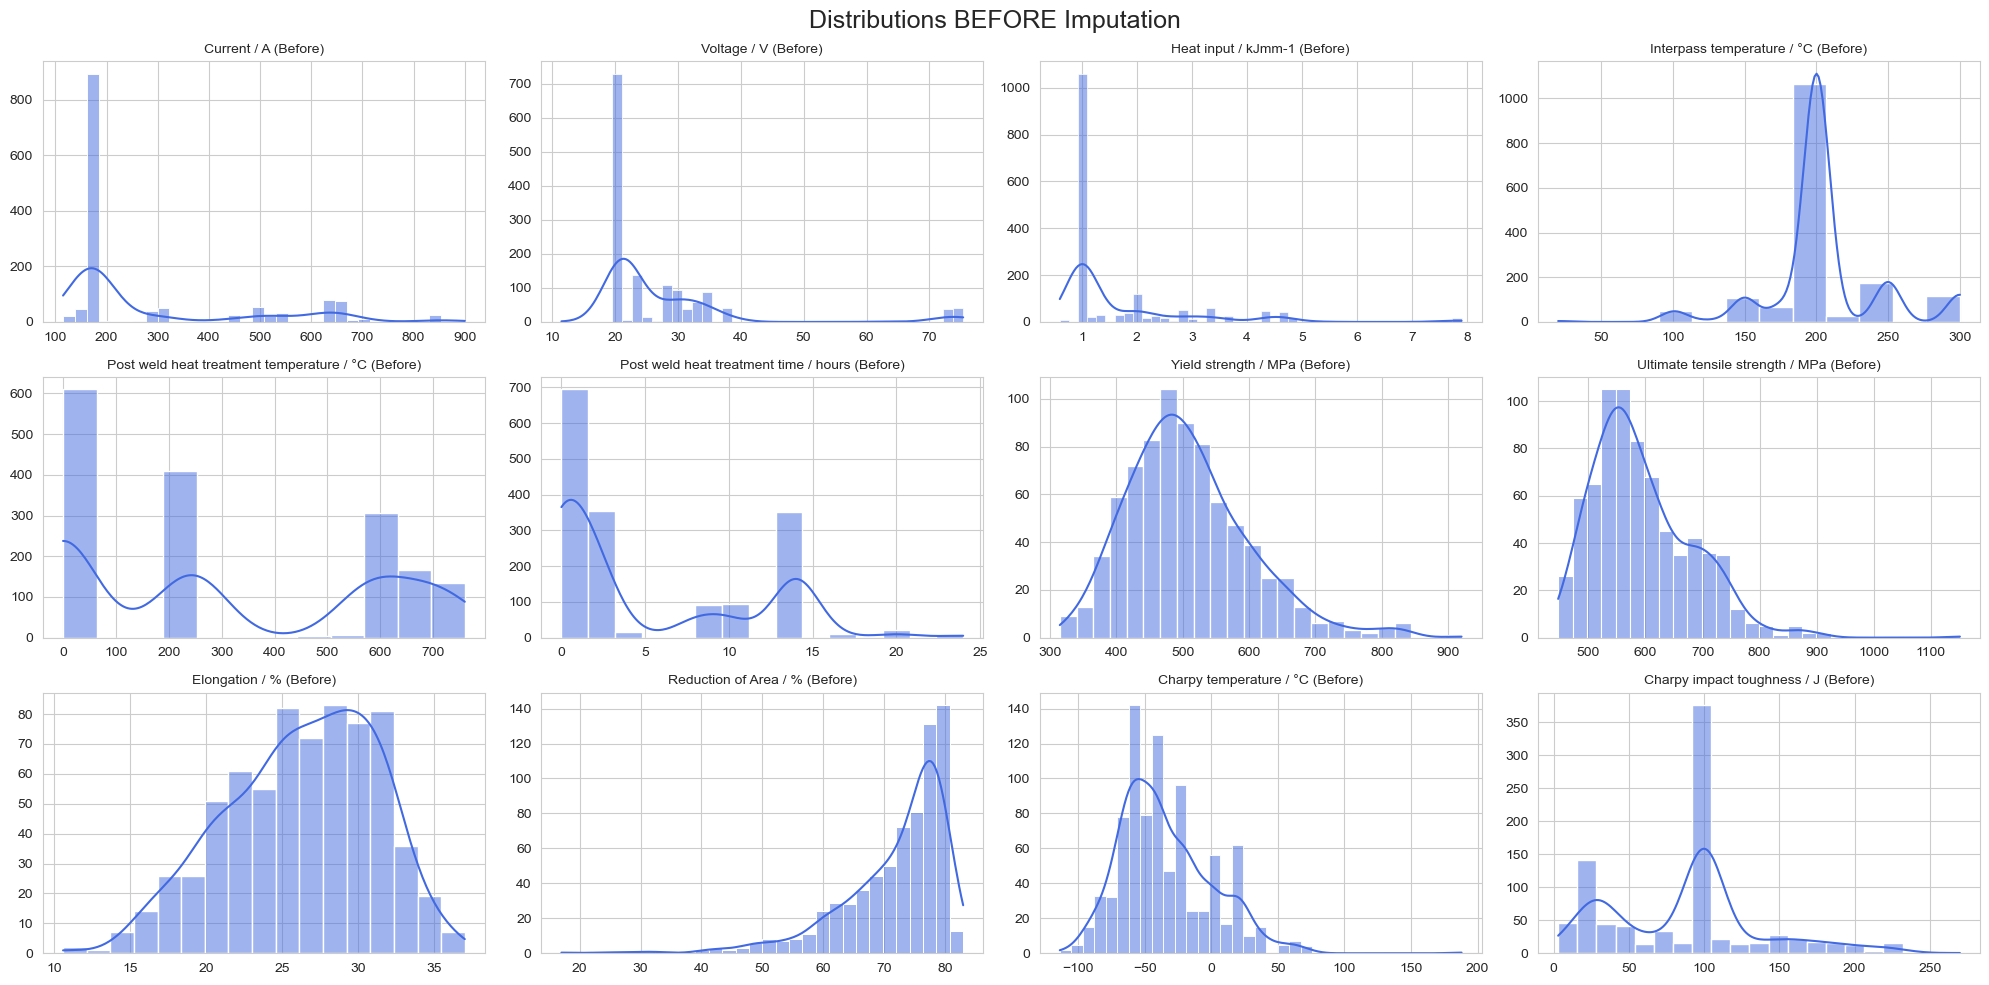

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
n_cols = 4
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(cols[:n_rows * n_cols]):
    sns.histplot(df_num[col], kde=True, color="royalblue", ax=axes[i])
    axes[i].set_title(f"{col} (Before)", fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distributions BEFORE Imputation", fontsize=18)
plt.tight_layout()
plt.show()


- Median imputation for skewed process and mechanical variables → robust to outliers and preserves central tendency.

- Current / A, Voltage / V, Heat input / kJ mm⁻¹, Interpass temperature / °C → median reflects typical welding conditions.

- PWHT temperature / °C and PWHT time / h → imputed as 0 to represent no post-weld heat treatment.

- Mechanical properties (UTS, Elongation, Reduction of Area) → median maintains realistic mechanical behavior.

- Charpy temperature / °C and Charpy impact toughness / J → median avoids bias from few extreme values.

- Yield strength / MPa (target) → not imputed to prevent data leakage.

In [42]:
median_cols = [
    'Current / A', 'Voltage / V', 'Heat input / kJmm-1',
    'Interpass temperature / °C',
    'Ultimate tensile strength / MPa', 'Elongation / %',
    'Reduction of Area / %', 'Charpy temperature / °C',
    'Charpy impact toughness / J'
]

# Domain-specific PWHT handling
df_num['Post weld heat treatment temperature / °C'] = (
    df_num['Post weld heat treatment temperature / °C'].fillna(0)
)
df_num['Post weld heat treatment time / hours'] = (
    df_num['Post weld heat treatment time / hours'].fillna(0)
)

# Median for the rest
for col in median_cols:
    if col in df_num.columns:
        df_num[col] = df_num[col].fillna(df_num[col].median())


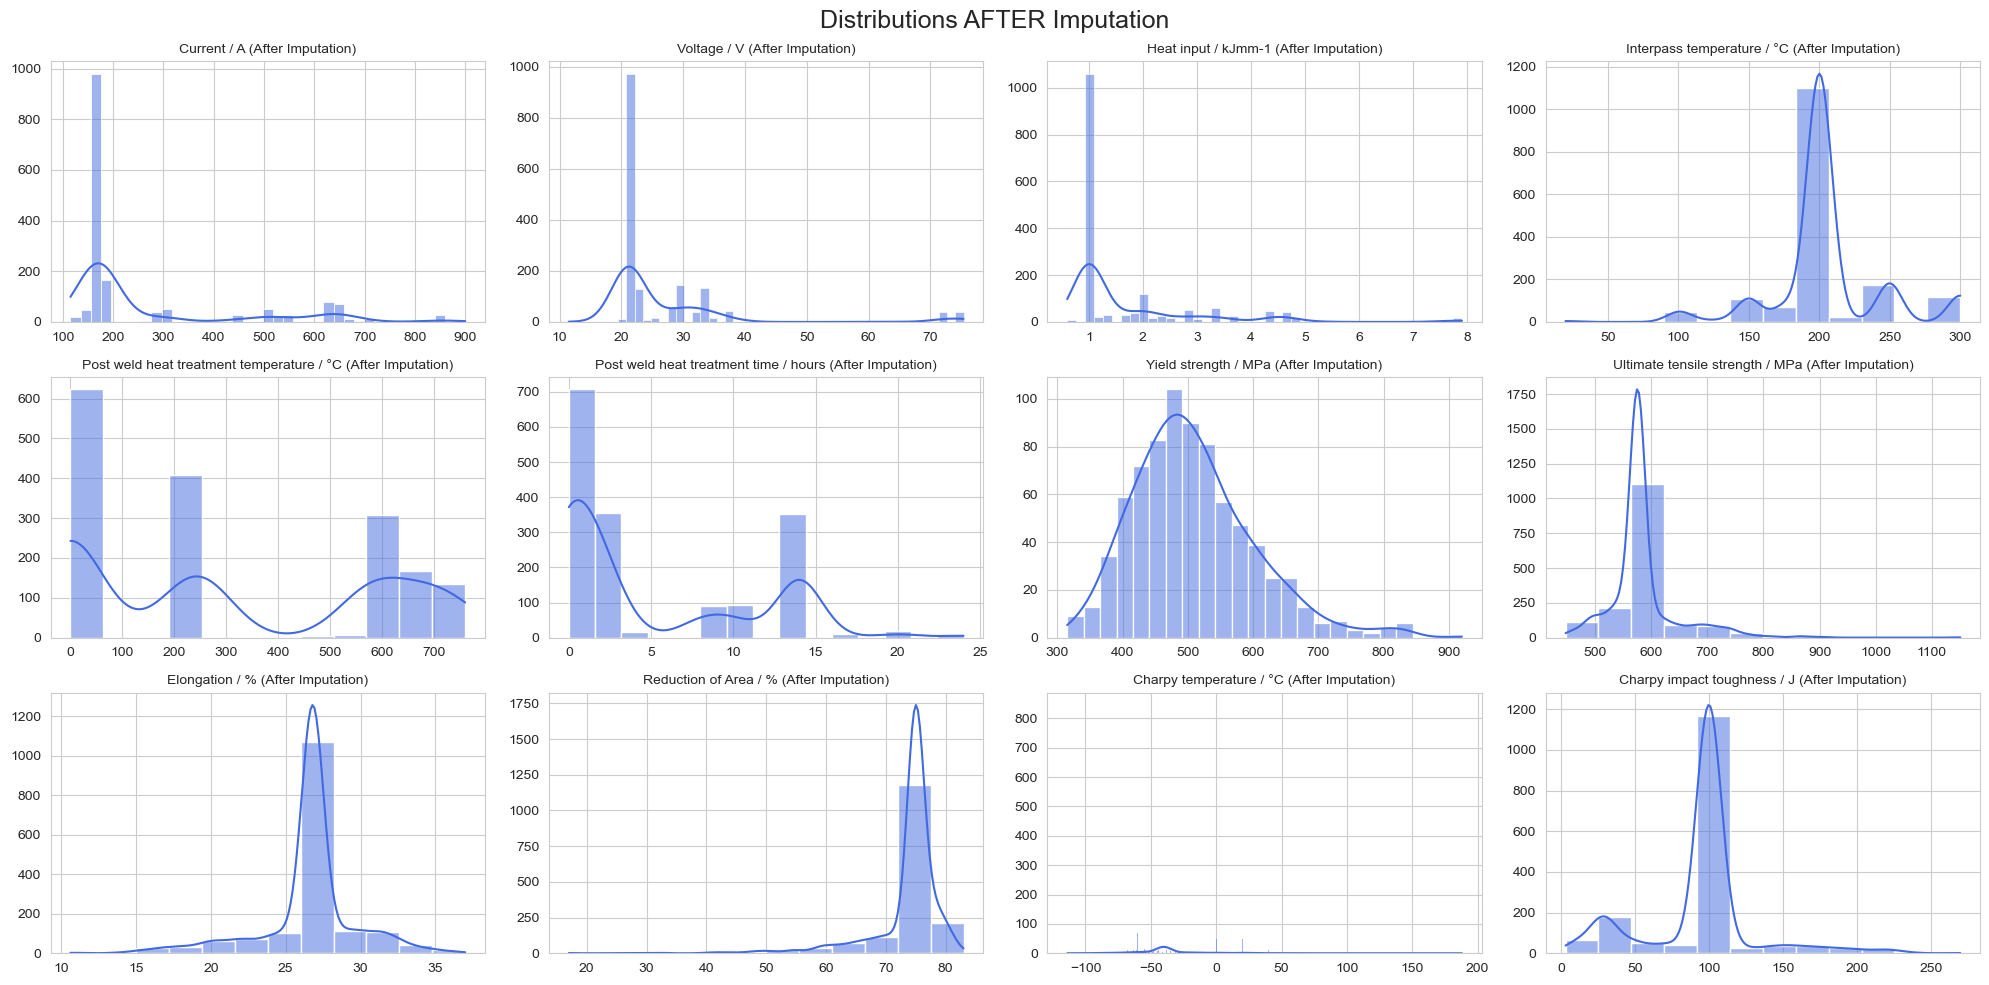

In [43]:
sns.set_style("whitegrid")
n_cols = 4
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(cols[:n_rows * n_cols]):
    sns.histplot(df_num[col], kde=True, color="royalblue", ax=axes[i])
    axes[i].set_title(f"{col} (After Imputation)", fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distributions AFTER Imputation", fontsize=18)
plt.tight_layout()
plt.show()


#### 2. Scale Up 

- Some are percentages (Carbon, Silicon, …).

- Some are ppm (Oxygen, Titanium, Nitrogen).

- Some are physical process parameters (Current, Voltage, Heat input, Temperature).

- Target-like variable: Charpy impact toughness (J) seems like an output property of the weld (mechanical performance).

Need to scale up all these numerical feartures 

Need to ckeck if the dis are normal to do StandardScaler else w neeed to do MinMax maybe based on the TD1 of the !! 

array([[<Axes: title={'center': 'Carbon concentration / (weight%)'}>,
        <Axes: title={'center': 'Silicon concentration / (weight%)'}>,
        <Axes: title={'center': 'Manganese concentration / (weight%)'}>,
        <Axes: title={'center': 'Sulphur concentration / (weight%)'}>],
       [<Axes: title={'center': 'Phosphorus concentration / (weight%)'}>,
        <Axes: title={'center': 'Oxygen concentration / parts per million by weight'}>,
        <Axes: title={'center': 'Titanium concentration / parts per million by weight'}>,
        <Axes: title={'center': 'Nitrogen concentration / parts per million by weight'}>],
       [<Axes: title={'center': 'Current / A'}>,
        <Axes: title={'center': 'Voltage / V'}>,
        <Axes: title={'center': 'Heat input / kJmm-1'}>,
        <Axes: title={'center': 'Interpass temperature / °C'}>],
       [<Axes: title={'center': 'Post weld heat treatment temperature / °C'}>,
        <Axes: title={'center': 'Post weld heat treatment time / hours'}

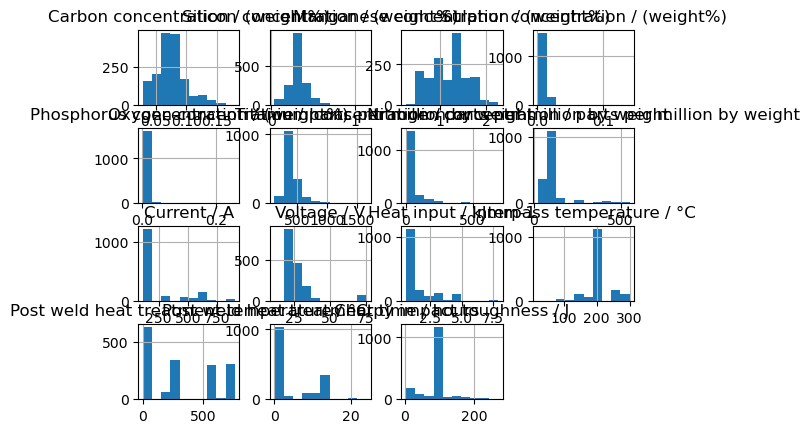

In [12]:
df.hist()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify features (all columns except the target)
feature_cols = df.columns

# Initialize scaler
scaler = StandardScaler()

# Scale in place (overwrite values in df)
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Check result
print(df.head())


In [14]:
df

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Oxygen concentration / parts per million by weight,Titanium concentration / parts per million by weight,Nitrogen concentration / parts per million by weight,Current / A,Voltage / V,Heat input / kJmm-1,Interpass temperature / °C,Post weld heat treatment temperature / °C,Post weld heat treatment time / hours,Charpy impact toughness / J
0,-1.612394,-0.254200,-1.447095,-0.137868,-0.047776,-0.111961,-0.280608,-0.264426,-0.531448,-0.571041,-0.540021,-0.122543,-0.183069,1.477047,0.176799
1,-1.612394,-0.254200,-1.447095,-0.137868,-0.047776,-0.111961,-0.280608,-0.264426,-0.531448,-0.571041,-0.540021,-0.122543,-1.058549,-0.823116,0.176799
2,-1.612394,-0.254200,-1.447095,-0.137868,-0.047776,-0.111961,-0.280608,-0.264426,-0.531448,-0.571041,-0.540021,-0.122543,0.972566,-0.494521,0.176799
3,-1.612394,-0.165249,-0.452386,-0.227149,0.054459,-0.111961,-0.280608,-0.264426,-0.531448,-0.571041,-0.540021,-0.122543,-0.183069,1.477047,0.176799
4,-1.612394,-0.165249,-0.452386,-0.227149,0.054459,-0.111961,-0.280608,-0.264426,-0.531448,-0.571041,-0.540021,-0.122543,-1.058549,-0.823116,0.176799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,1.024597,0.190556,-0.792681,-0.137868,0.156695,-0.538974,-0.280608,3.564445,1.006540,0.206781,0.230352,-0.122543,1.602911,-0.494521,0.176799
1648,0.522313,0.279507,-0.845034,-0.137868,0.207812,0.027789,-0.280608,3.515825,1.006540,0.206781,0.230352,-0.122543,1.602911,-0.494521,0.176799
1649,0.606027,0.101605,-0.818857,-0.137868,0.156695,-0.321585,-0.280608,-0.106409,1.006540,0.206781,0.230352,-0.122543,1.602911,-0.494521,0.176799
1650,0.689741,0.190556,-0.792681,-0.137868,0.156695,-0.088669,-0.280608,-0.069944,1.006540,0.206781,0.230352,-0.122543,1.602911,-0.494521,0.176799


## VarianceThreshold

Some columns may have almost constant values → not useful. The idea is to remove the columns with low-information, by applying the a variance threshold. 

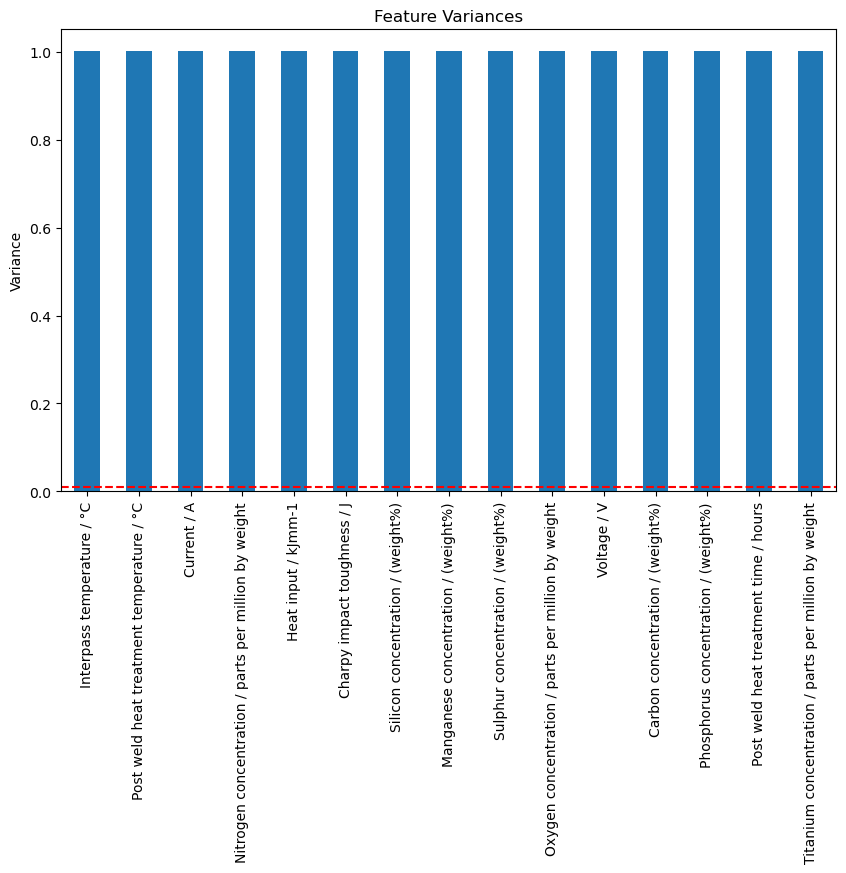

In [15]:
variances = df.var()
plt.figure(figsize=(10,6))
variances.sort_values().plot(kind="bar")
plt.axhline(y=0.01, color="r", linestyle="--")
plt.title("Feature Variances")
plt.ylabel("Variance")
plt.show()


Columns have different units / scales , then variance values are not comparable across features. Need to scale  up before applyong the variance threshold

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("var_thresh", VarianceThreshold(threshold=0.5))
])

X_reduced = pipeline.fit_transform(df.fillna(0))

# Get feature names after selection
mask = pipeline.named_steps['var_thresh'].get_support()
selected_features = df.columns[mask]
print("Kept features:", selected_features.tolist())


Kept features: ['Carbon concentration / (weight%)', 'Silicon concentration / (weight%)', 'Manganese concentration / (weight%)', 'Sulphur concentration / (weight%)', 'Phosphorus concentration / (weight%)', 'Oxygen concentration / parts per million by weight', 'Titanium concentration / parts per million by weight', 'Nitrogen concentration / parts per million by weight', 'Current / A', 'Voltage / V', 'Heat input / kJmm-1', 'Interpass temperature / °C', 'Post weld heat treatment temperature / °C', 'Post weld heat treatment time / hours', 'Charpy impact toughness / J']


In [18]:
print(len(selected_features))

15


## Correlation filtering

The idea is to remove redundant features; if any two columns are highly correlated.

In [19]:
corr_matrix = df.corr().abs()  # absolute correlation


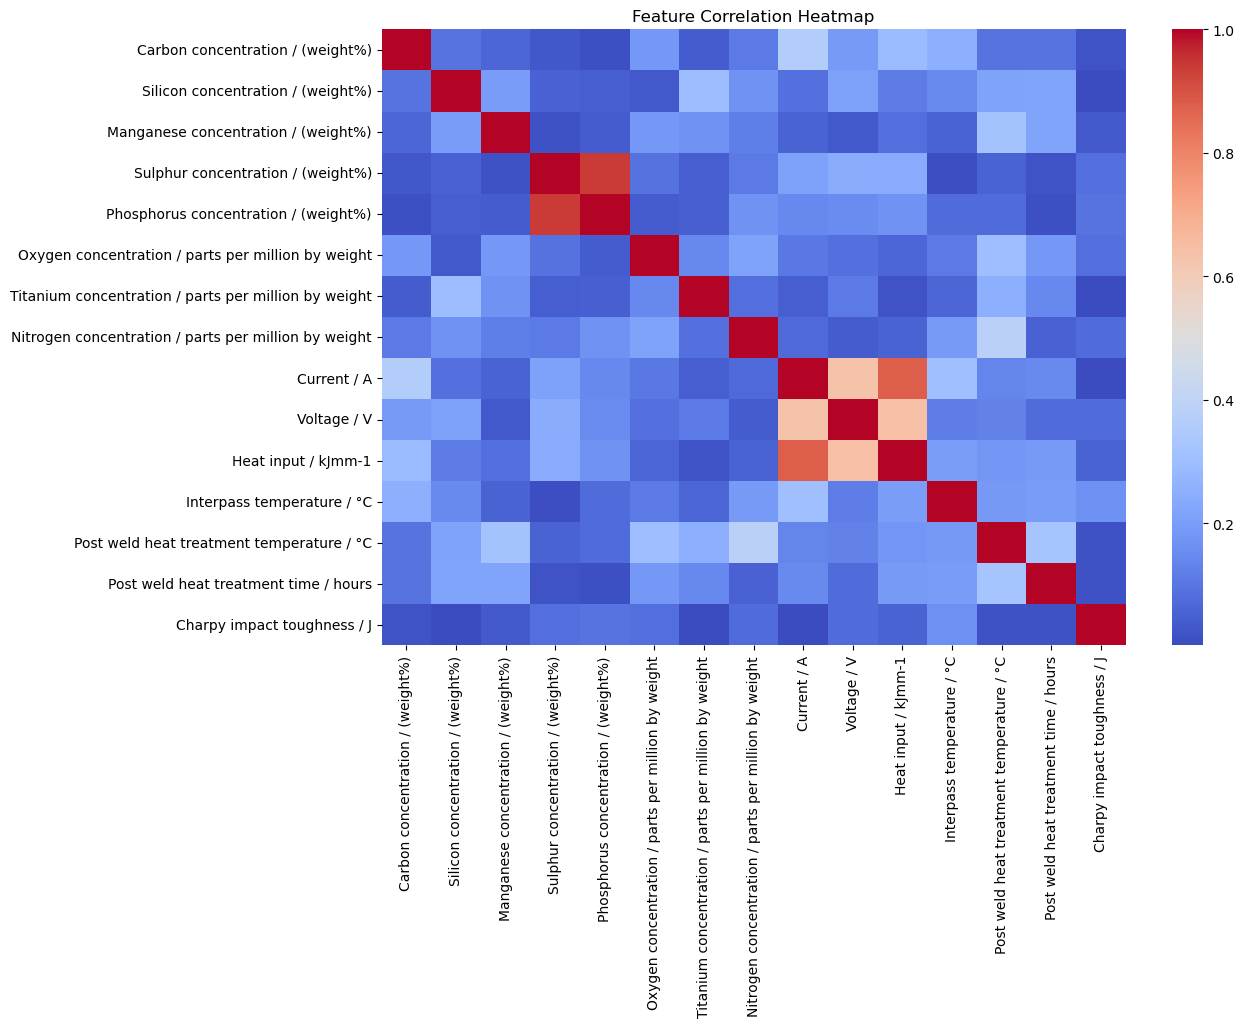

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


## PCA 

Project features into fewer dimensions while keeping maximum variance.

In [21]:
X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
X_scaled.shape

(1652, 15)

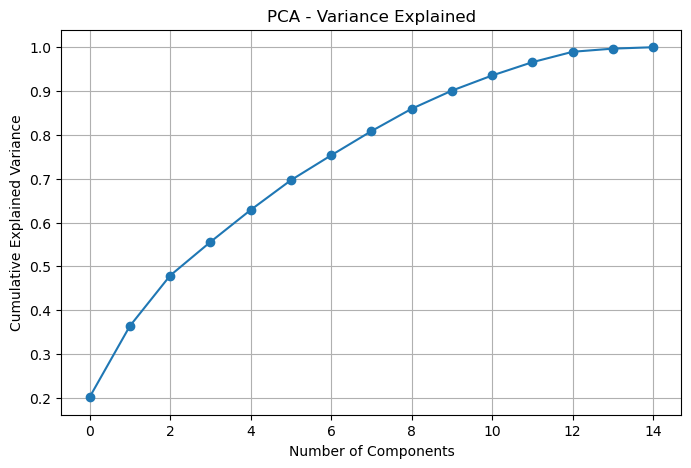

In [23]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Variance Explained")
plt.grid(True)
plt.show()


NB: (previous curve )
- The curve rises steeply at the beginning (first ~10 components) → those capture most of the variance.

- After around 15–18 components, the slope flattens → each new component adds only a tiny bit more variance.

- Beyond ~25 components, close to 95–98% cumulative variance → adding more doesn’t bring much.

In [24]:
pca = PCA(n_components=0.95)  # keep 95% variance or maybe only
X_reduced = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)


Original shape: (1652, 15)
Reduced shape: (1652, 12)


Test 3 components 

In [25]:
from sklearn.decomposition import PCA

# 3-component PCA
pca_3d = PCA(n_components=3)
X_pca3 = pca_3d.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape (3 PCs):", X_pca3.shape)


Original shape: (1652, 15)
Reduced shape (3 PCs): (1652, 3)


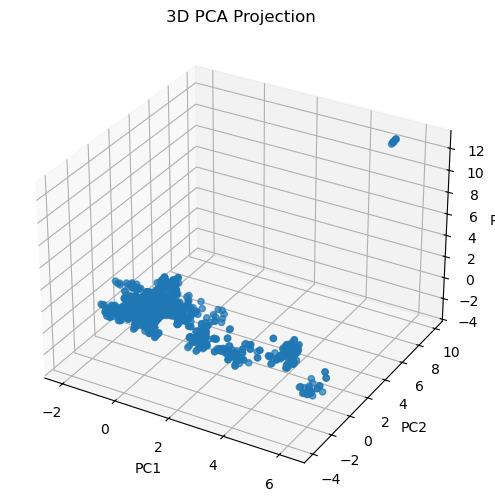

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plots

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# scatter plot of first 3 PCs
ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], alpha=0.7)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Projection")

plt.show()


In [27]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=df.columns)
print(loadings.head())


                                           PC1       PC2       PC3       PC4  \
Carbon concentration / (weight%)      0.244322 -0.000017 -0.253836  0.432883   
Silicon concentration / (weight%)    -0.048973 -0.313723  0.295905  0.071335   
Manganese concentration / (weight%)   0.112298 -0.269534  0.242357 -0.091030   
Sulphur concentration / (weight%)     0.264493  0.315792  0.509249  0.163895   
Phosphorus concentration / (weight%)  0.219894  0.321896  0.546309  0.173484   

                                           PC5       PC6       PC7       PC8  \
Carbon concentration / (weight%)      0.439328 -0.133103 -0.284648 -0.052533   
Silicon concentration / (weight%)     0.087264  0.498142 -0.189709 -0.094582   
Manganese concentration / (weight%)   0.266792 -0.204666  0.253865 -0.229129   
Sulphur concentration / (weight%)    -0.159697 -0.040012 -0.087583 -0.020845   
Phosphorus concentration / (weight%) -0.109181 -0.106334 -0.049716 -0.008143   

                                      